In [1]:
import numpy as np
import glob
from plotting import *
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import scipy.optimize as optimize
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('paper_labels_colors.mplstyle')
%matplotlib inline

In [2]:
files = glob.glob("../2planet-i-sinusoidal-fig3/twoplanet*.txt")
files=sorted(files)
files=files[:3]
len(files)

3

In [3]:
files

['../2planet-i-sinusoidal-fig3/twoplanet-edamp.txt',
 '../2planet-i-sinusoidal-fig3/twoplanet-edamp2.txt',
 '../2planet-i-sinusoidal-fig3/twoplanet-edamp3.txt']

In [11]:
# easier to make a function that returns info for plot I think 
def return_aei_plotdata(data,indxPlanets,finalParam,tau,expEq,rebound=True,force_trange=None):
    print(f"plot only {indxPlanets} planets")
    nP = len(indxPlanets)
    nt = len(data[0])
    das = np.zeros(nP)
    des = np.zeros(nP)
    dis = np.zeros(nP)
    
    aeqs = np.empty((nP,nt))
    eeqs = np.empty((nP,nt))
    ieqs = np.empty((nP,nt))

    t_dat = data[0]['Time']
    if force_trange is not None: 
        t_dat = t_dat[(t_dat>force_trange[0])&(t_dat<force_trange[1])]
    else:
        pass
    
    for j,i in enumerate(indxPlanets):
    #         print(i)
        das[j] = finalParam[0][i] - data[i]['a'][0]
        des[j] = finalParam[1][i] - data[i]['e'][0]
        dis[j] = finalParam[2][i] - data[i]['i'][0]

        aeq = np.array(get_equation(data[i],'a',das[j],tau[i][0],eqBool=expEq[i][0],trange=force_trange))
        eeq = np.array(get_equation(data[i],'e',des[j],tau[i][1],eqBool=expEq[i][1],trange=force_trange))
        ieq = np.array(get_equation(data[i],'i',dis[j],tau[i][2],eqBool=expEq[i][2],trange=force_trange)) 

        t_eq,aeqs[j] =aeq[0],np.array(aeq[1])
        t_eq,eeqs[j] = eeq[0],np.array(eeq[1])
        t_eq,ieqs[j] = ieq[0],np.array(ieq[1])
    return aeqs, eeqs, ieqs

../2planet-i-sinusoidal-fig3/twoplanet-edamp.txt
plot only [0, 1] planets
../2planet-i-sinusoidal-fig3/twoplanet-edamp2.txt
plot only [0, 1] planets
../2planet-i-sinusoidal-fig3/twoplanet-edamp3.txt
plot only [0, 1] planets


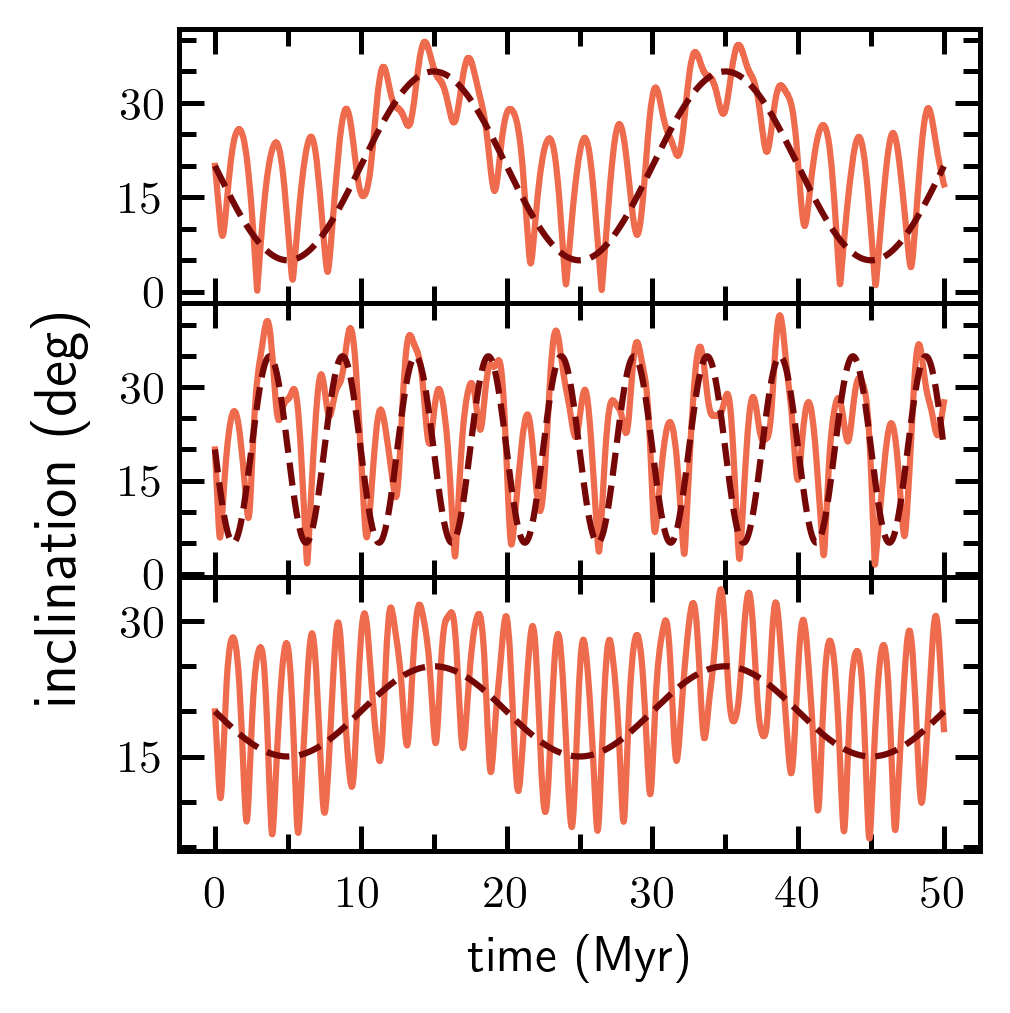

In [15]:
taus0 = np.array(([1e7, 5e5, 2e7, 1e7, 3e7],[1e7, 5e5, 2e7, 1e7, 3e7]))*2*np.pi
fparams0 = np.array(([5.0,30.0],
                    [0.1,0.3],
                    np.array([12.0,5.0])*np.pi/180,
                    np.array([85.0,220.0])*np.pi/180,
                    np.array([50.0,200.0])*np.pi/180))
expEq0 = np.array(([None,None,2,None,None],[None,None,2,None,None]))

taus1 = np.array(([1e7, 5e5, 5e6, 1e7, 3e7],[1e7, 5e5, 5e6, 1e7, 3e7]))*2*np.pi
fparams1 = np.array(([5.0,30.0],
                    [0.1,0.3],
                    np.array([12.0,5.0])*np.pi/180,
                    np.array([85.0,220.0])*np.pi/180,
                    np.array([50.0,200.0])*np.pi/180))
expEq1 = np.array(([None,None,2,None,None],[None,None,2,None,None]))

taus2 = np.array(([1e7, 5e5, 2e7, 1e7, 3e7],[1e7, 5e5, 2e7, 1e7, 3e7]))*2*np.pi
fparams2 = np.array(([5.0,30.0],
                    [0.1,0.3],
                    np.array([12.0,15.0])*np.pi/180,
                    np.array([85.0,220.0])*np.pi/180,
                    np.array([50.0,200.0])*np.pi/180))
expEq2 = np.array(([None,None,2,None,None],[None,None,2,None,None]))

fp = [fparams0,fparams1,fparams2]
tau = [taus0,taus1,taus2]
expEq = [expEq0,expEq1,expEq2]


fig,ax = plt.subplots(3,1,figsize=(3.3,3.3),sharex=True)
ax = ax.ravel()
for i,f in enumerate(files):
    print(f)
    dat = get_data(f,2,rebound=True)
    t = dat[0]['Time']/(2*np.pi)
    ax[i].plot(t/1e6,dat[1]['i']*180/np.pi,'-')

    aeq,eeq,ieq = return_aei_plotdata(dat,[0,1],fp[i],tau[i],expEq[i])

    ax[i].plot(t/(1e6),ieq[1]*180/np.pi,'--', color = "#750706")

ax[0].yaxis.set_major_locator(MultipleLocator(15))
ax[1].yaxis.set_major_locator(MultipleLocator(15))
ax[2].yaxis.set_major_locator(MultipleLocator(15))
ax[0].yaxis.set_minor_locator(AutoMinorLocator(3))
ax[1].yaxis.set_minor_locator(AutoMinorLocator(3))
ax[2].yaxis.set_minor_locator(AutoMinorLocator(3))
ax[2].xaxis.set_major_locator(MultipleLocator(10))
ax[2].xaxis.set_minor_locator(AutoMinorLocator(2))
ax[2].set_xlabel("time (Myr)")
fig.supylabel("inclination (deg)")
fig.subplots_adjust(hspace=0.0,left = 0.17,right=0.98,bottom=0.15,top=0.98) 
# plt.tight_layout()
plt.savefig("fig3.pdf",dpi=300)
plt.show()
plt.close()


../2planet-i-sinusoidal-fig3/twoplanet-edamp.txt
plot only [0, 1] planets
../2planet-i-sinusoidal-fig3/twoplanet-edamp2.txt
plot only [0, 1] planets
../2planet-i-sinusoidal-fig3/twoplanet-edamp3.txt
plot only [0, 1] planets


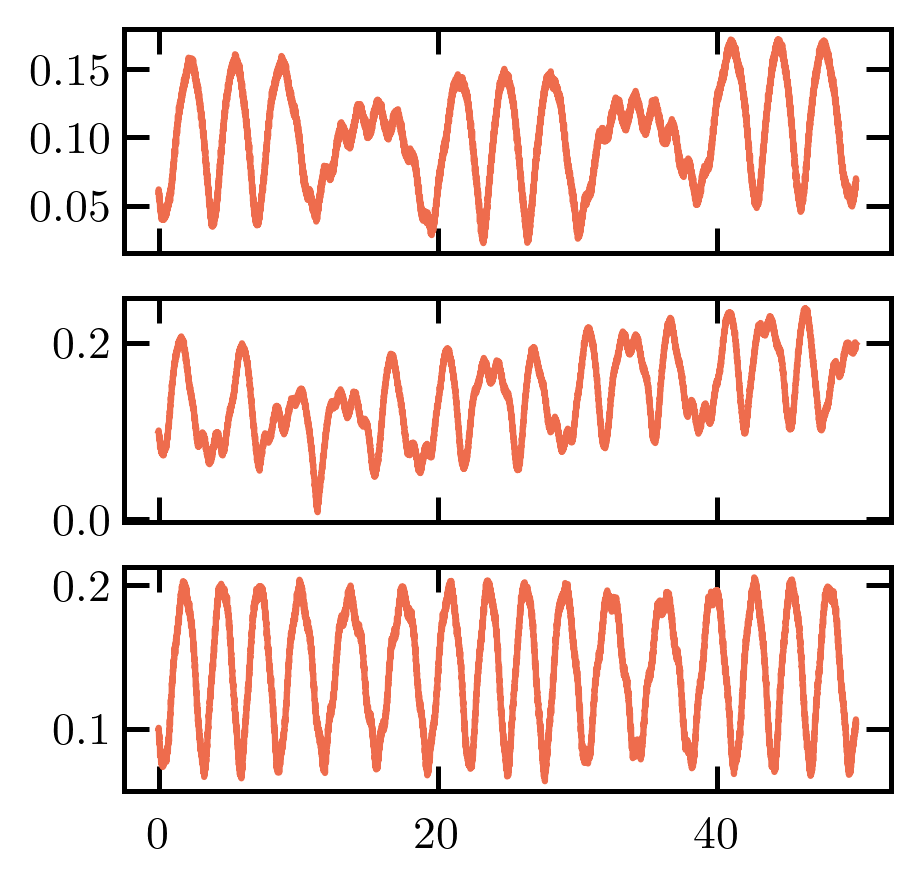

In [18]:
# fig1,ax1 = plt.subplots(3,1,figsize=(3.3,3.3),sharex=True)
# ax1 = ax1.ravel()
# for i,f in enumerate(files):
#     print(f)
#     dat = get_data(f,2,rebound=True)
#     t = dat[0]['Time']/(2*np.pi)
#     ax1[i].plot(t/1e6,dat[1]['a'])

#     aeq,eeq,ieq = return_aei_plotdata(dat,[0,1],fp[i],tau[i],expEq[i])

#     ax1[i].plot(t/1e6,aeq[1],'--', color = "#750706")
# plt.show()

fig1,ax1 = plt.subplots(3,1,figsize=(3.3,3.3),sharex=True)
ax1 = ax1.ravel()
for i,f in enumerate(files):
    print(f)
    dat = get_data(f,2,rebound=True)
    t = dat[0]['Time']/(2*np.pi)
    ax1[i].plot(t/1e6,dat[1]['e'])

    aeq,eeq,ieq = return_aei_plotdata(dat,[0,1],fp[i],tau[i],expEq[i])

    ax1[i].plot(t/1e6,eeq[1],'--', color = "#750706")
plt.show()

['../2planet-i-sinusoidal-fig3/twoplanet-edamp3.txt', '../2planet-i-sinusoidal-fig3/twoplanet-edamp4.txt', '../2planet-i-sinusoidal-fig3/twoplanet-edamp5.txt']
../2planet-i-sinusoidal-fig3/twoplanet-edamp3.txt
../2planet-i-sinusoidal-fig3/twoplanet-edamp4.txt
../2planet-i-sinusoidal-fig3/twoplanet-edamp5.txt


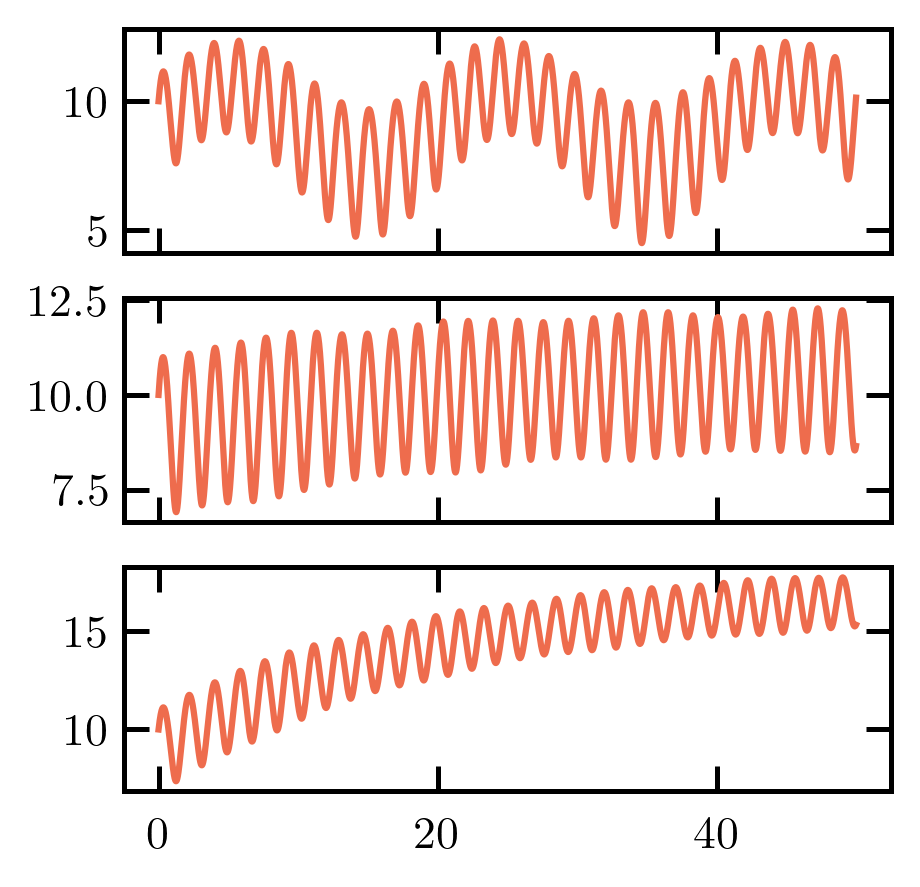

../2planet-i-sinusoidal-fig3/twoplanet-edamp3.txt
../2planet-i-sinusoidal-fig3/twoplanet-edamp4.txt
../2planet-i-sinusoidal-fig3/twoplanet-edamp5.txt


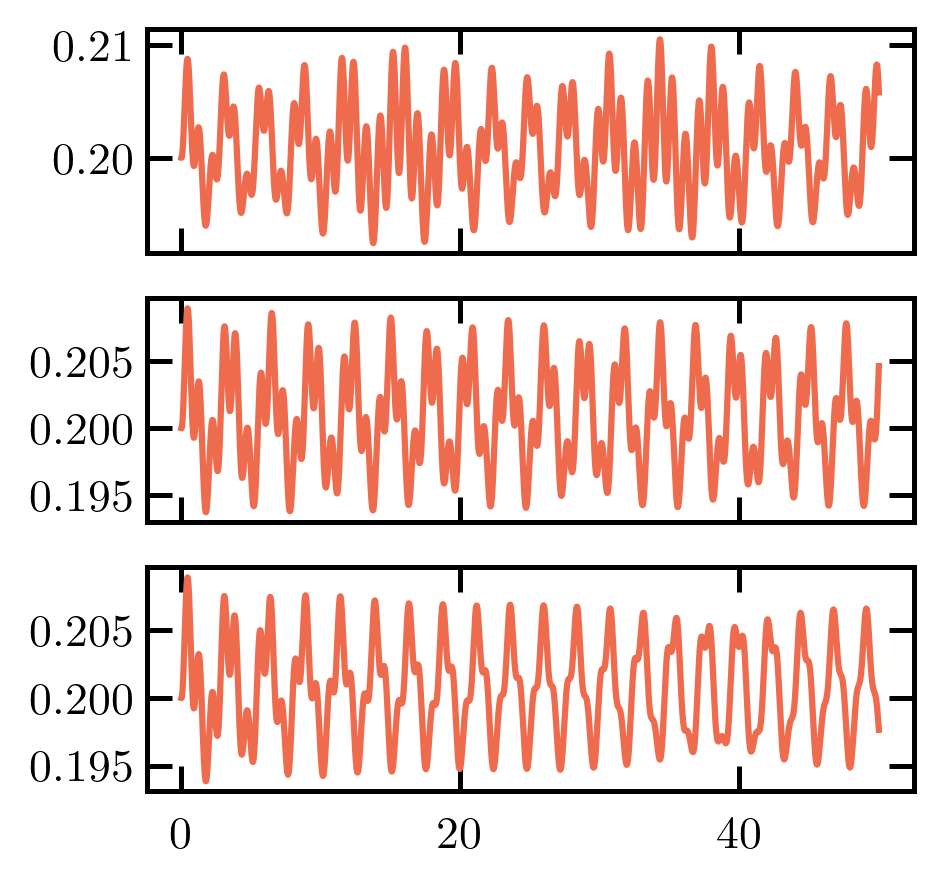

../2planet-i-sinusoidal-fig3/twoplanet-edamp3.txt
../2planet-i-sinusoidal-fig3/twoplanet-edamp4.txt
../2planet-i-sinusoidal-fig3/twoplanet-edamp5.txt


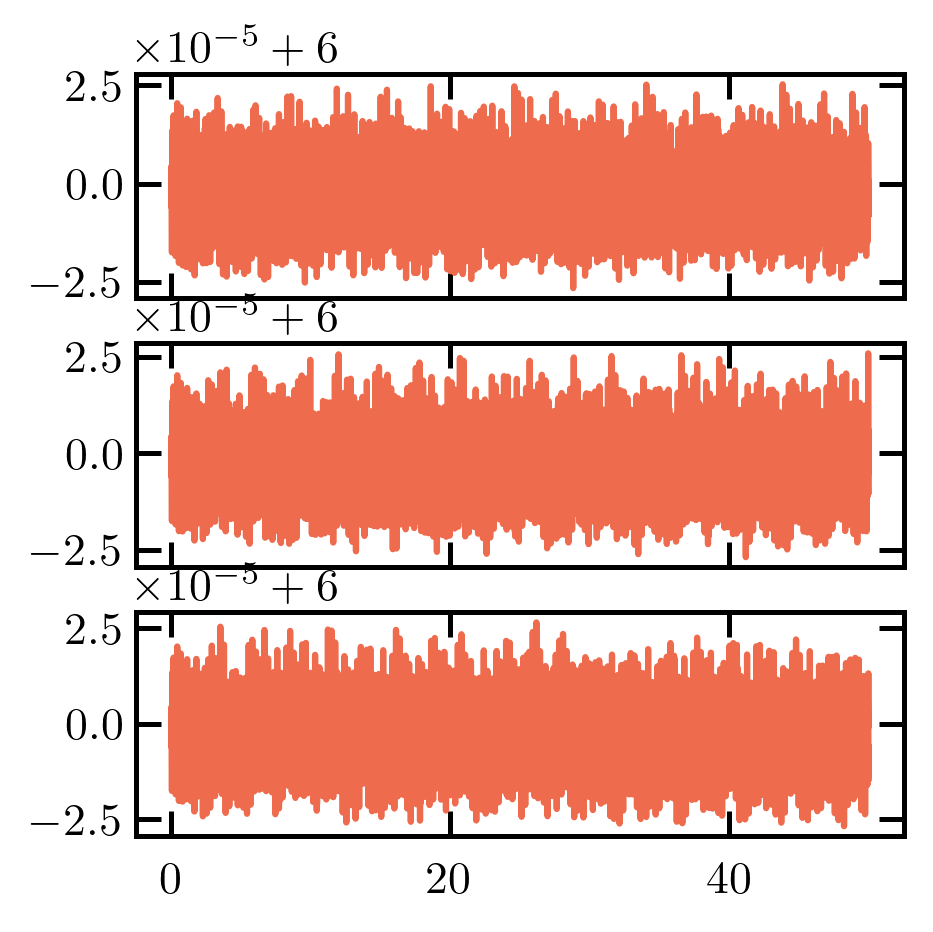

In [21]:
files = glob.glob("../2planet-i-sinusoidal-fig3/twoplanet-edamp*.txt")
files=sorted(files)
files=files[2:]
print(files)

fig1,ax1 = plt.subplots(3,1,figsize=(3.3,3.3),sharex=True)
ax1 = ax1.ravel()
for i,f in enumerate(files):
    print(f)
    dat = get_data(f,2,rebound=True)
    t = dat[0]['Time']/(2*np.pi)
    ax1[i].plot(t/1e6,dat[0]['i']*180/np.pi)

    # aeq,eeq,ieq = return_aei_plotdata(dat,[0,1],fp[2],tau[2],expEq[2])

    # ax1[0].plot(t/1e6,ieq[1]*180/np.pi,'--', color = "#750706")
plt.show()

fig1,ax1 = plt.subplots(3,1,figsize=(3.3,3.3),sharex=True)
ax1 = ax1.ravel()
for i,f in enumerate(files):
    print(f)
    dat = get_data(f,2,rebound=True)
    t = dat[0]['Time']/(2*np.pi)
    ax1[i].plot(t/1e6,dat[0]['e'])

    # aeq,eeq,ieq = return_aei_plotdata(dat,[0,1],fp[i],tau[i],expEq[i])

    # ax1[i].plot(t/1e6,eeq[1],'--', color = "#750706")
plt.show()

fig1,ax1 = plt.subplots(3,1,figsize=(3.3,3.3),sharex=True)
ax1 = ax1.ravel()
for i,f in enumerate(files):
    print(f)
    dat = get_data(f,2,rebound=True)
    t = dat[0]['Time']/(2*np.pi)
    ax1[i].plot(t/1e6,dat[0]['a'])

    # aeq,eeq,ieq = return_aei_plotdata(dat,[0,1],fp[i],tau[i],expEq[i])

    # ax1[i].plot(t/1e6,aeq[1],'--', color = "#750706")
plt.show()
